<a href="https://colab.research.google.com/github/HamzahSiddiquipvt/Unsupervised-NetflixTVShows-HamzaSiddiqui/blob/main/AB_Unsupervised_NetfixMoviesTvShowsClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

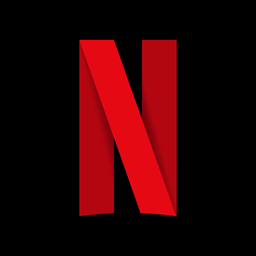

# **Project Name**    - Netfix Movies and Tv Shows Clustering



##### **Project Type**    - Unsupervised
##### **Team Member 1     - Hamza Siddiqui**


# **Project Summary -**

With more than 83 million subscribers and presence in more than 190
countries, Netflix is the most popular Internet television network in the
world. Its users watch more than 125 million hours of TV and movie
content daily, including original series, documentaries, and feature films.
On almost any screen that is linked to the Internet, members can watch
as much as they want, whenever and wherever. Without interruptions or
obligations, members can play, pause, and resume watching at any time.


In this project, I have done

●1.Exploratory Data Analysis

● 2.Understanding what type content is available in different countries

● 3.Is Netflix increasingly focusing on TV rather than movies in recent years.

● 4.Clustering similar content by matching text-based features

The goal of this project is to classify/group the Netflix shows into certain clusters such that
movie and TV shows that are in the same cluster/group should have similar properties
and/or features, while data points in different groups should have highly dissimilar
properties and/or features.

Detailed workflow:
1. Analyze Data: In this initial step we went to look for different features available and tried to understand the
data. During this stage, we looked for the shape of data, data types of each feature, statistical summary etc.

2. EDA: EDA or Exploratory Data Analysis is the critical process of performing the initial investigation on the
data. So, through this we have observed certain trends and dependencies and drawn certain conclusions
from the dataset that will be useful for further processing.

3. Data Cleaning: Checked duplicated values present in the dataset. After that comes the null value and
outlier detection and treatment. For the null values imputation we simply replace with empty string and
drop some of the null rows then analyze outlier and handling.

4. Textual Data Preprocessing: During this stage, cluster the data based on the attributes: director, cast,
country, genre, rating and description. Data preprocessing include Remove all stop words and punctuation
marks, convert all textual data to lowercase. Stemming to generate a meaningful word out of corpus of
words. Tokenization of corpus and Word vectorization. We used Principal Component Analysis (PCA) to
handle the curse of dimensionality.

5. Clusters Implementation: Use K-Means and Agglomerative Hierarchical clustering algorithms to cluster
the movies, obtain the optimal number of clusters using different techniques.

6. Build Content Based Recommendation System: A content-based recommender system was built using
the similarity matrix obtained after using cosine similarity. This recommender system will display 10
recommendations to the user based on the type of movie/show they watched.



# **GitHub Link -**

https://github.com/HamzahSiddiquipvt/Unsupervised-Netflix-HamzaSiddiqui.git

# **Problem Statement**



This dataset consists of tv shows and movies available on Netflix as of 2019. The
dataset is collected from Flexible which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV
shows on Netflix has nearly tripled since 2010. The streaming services number of
movies has decreased by more than 2,000 titles since 2010, while its number of
TV shows has nearly tripled. It will be interesting to explore what all other
insights can be obtained from the same dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd

#Plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams

#Date time conversion
from datetime import datetime

#Installations
!pip install contractions
!pip install ntlk

#sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as shc

#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#nltk
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

import contractions

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

### Dataset First View

In [ ]:
# Dataset First Look
try:
  df_Master = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

  df_Master_copy = df_Master                                                        #Creating a copy to preserve original data
  #Return the first 5 rows of the DataFrame
  df_Master.head()
except:
  print("There was a problem loading the file")

In [ ]:
df_Master.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('\n', f'The number of rows dataset is : {df_Master.shape[0] }')
print('\n', f'The number of columns of the dataset is : {df_Master.shape[1] }')
print('\n', f'The dimension of the dataset is : {df_Master.shape }')            #To get number of rows and columns in the dataset

### Dataset Information

In [ ]:
# Dataset Info
df_Master.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Number of duplicate records = " + str(len(df_Master[df_Master.duplicated()])))

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df_Master.isna().any())

In [ ]:
missingCount = df_Master.isna().sum()
print(missingCount)

# Visualize missing values as a matrix
msno.matrix(df_Master,figsize=(10,3),fontsize=12)

### What did you know about your dataset?

The dataset consists of listings of all the movies and tv shows available on Netflix, along with details
such as - cast, directors, ratings, release year, duration, etc

● show_id : Unique ID for every Movie / Tv Show

● type : Identifier - A Movie or TV Show

● title : Title of the Movie / Tv Show

● director : Director of the Movie

● cast : Actors involved in the movie / show

● country : Country where the movie / show was produced

● date_added : Date it was added on Netflix

● release_year : Actual Release Year of the movie / show

● rating : TV Rating of the movie / show

● duration : Total Duration - in minutes or number of seasons

● listed_in : Genre

● description: The Summary description

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_Master.columns

In [ ]:
# Dataset Describe
df_Master.describe().T

### Variables Description

The dataset consists of listings of all the movies and tv shows available on Netflix, along with details
such as - cast, directors, ratings, release year, duration, etc

● show_id : Unique ID for every Movie / Tv Show

● type : Identifier - A Movie or TV Show

● title : Title of the Movie / Tv Show

● director : Director of the Movie

● cast : Actors involved in the movie / show

● country : Country where the movie / show was produced

● date_added : Date it was added on Netflix

● release_year : Actual Release Year of the movie / show

● rating : TV Rating of the movie / show

● duration : Total Duration - in minutes or number of seasons

● listed_in : Genre

● description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable
df_Master.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Handling the missing values
df_Master[['director','country','cast']] = df_Master[['director','country','cast']].fillna('Unknown')
df_Master['rating'] = df_Master['rating'].fillna(df_Master['rating'].mode()[0])                                                 #Assigning the most common rating to missing ratings

missingCount = df_Master.isna().sum()
print(missingCount)

# Visualize missing values as a matrix
msno.matrix(df_Master,figsize=(10,3),fontsize=12)


In [ ]:
##check for duplicates
duplicates =len(df_Master[df_Master.duplicated()])
print(duplicates)

There are no duplicate records

In [ ]:
#Removing show_id as it does not impact clustering
df_Master = df_Master.drop(['show_id'], axis=1)

In [ ]:
# # Typecasting 'date_added' from string to datetime
df_Master['month_added'] = pd.DatetimeIndex(df_Master['date_added']).month_name()

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Kids_6to12',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Kids_6to12',
    'TV-Y7': 'Kids_6to12',
    'TV-14': 'Teenagers',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teenagers',
    'TV-G': 'Kids',
    'PG': 'Kids_6to12',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df_Master['target_ages'] = df_Master['rating'].replace(ratings)

### What all manipulations have you done and insights you found?

Missing values:

The dataset had a lot of missing values, the text columns have been handled by replacing them with unknown
The rating column missing values have been replaced with the most common rating

Date:
The date column has been converted to date type, to separate the year and month.

Show_ID:
The column has been dropped as it shouldnt impact the clustering

Rating:
All the ratings have been categorized into 4 types.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Movie - TV show division

In [ ]:
#Counting number of Movies and Shows
print("*************************************************")
type_division = df_Master['type'].value_counts()
print(type_division)
print("*************************************************\n")

# displaying chart
type_division.plot.pie(title="Type of video", legend=False,autopct='%1.1f%%', explode=(0.1,0.0),shadow=True, startangle=0,fontsize=12, colors = ['#ff9999','#66b3ff'])
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts show the size of items (called wedge) in one data series, proportional to the sum of the items. The data points in a pie chart are shown as a percentage of the whole pie. Since we wanted to understand what division of the total videos is movies and what is TV Shows, I chose a pie chart.

##### 2. What is/are the insight(s) found from the chart?

Netflix contains 69% movies and 31% television shows, indicating that movie shows have more content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This could help business in decision making while buying rights for new movies or TV shows.

#### Chart - 2 : Production growth yearly (last 10 years)

In [ ]:
# Chart - 2 visualization code
TV_DF=df_Master[(df_Master['type']=='TV Show') & (df_Master['release_year'] >= 2010) & (df_Master['release_year'] < 2021)]       #Exclusing 2021 since 2021 has only 1 month data
MOV_DF=df_Master[(df_Master['type']=='Movie') & (df_Master['release_year'] >= 2010) & (df_Master['release_year'] < 2021)]

TV_DF = TV_DF['release_year'].value_counts().sort_index(ascending=False)
MOV_DF = MOV_DF['release_year'].value_counts().sort_index(ascending=False)

print("\n TV Show Count")
print(TV_DF)
print("\n\n Movie Count")
print(MOV_DF)

# visualizing the movies and tv_shows based on the release year
sns.set()
TV_DF.plot( linewidth=3.5, color='lime',xlabel = "Years", ylabel ="TV Show Releases",title = "Production growth yearly" )
MOV_DF.plot( linewidth=3.5, color='blue',xlabel = "Years", ylabel ="Movie Releases",title = "Production growth yearly")

In [ ]:
TV_DF=TV_DF.reset_index(name = 'count').sort_values(by='count',ascending=False)
plt.figure(figsize=(7,3))
plt.xlabel="Count"
plt.ylabel="Year"
plt.title="TV Shows per year"
plt.barh(TV_DF['index'],TV_DF['count'], color='yellowgreen')

In [ ]:
MOV_DF = MOV_DF.reset_index(name='count').sort_values(by='count',ascending=False)
plt.figure(figsize=(7,3))
plt.barh(MOV_DF['index'],MOV_DF['count'],color='coral')


##### 1. Why did you pick the specific chart?

Line charts are used to represent the relation between two data X and Y on a different axis.
Hence to show the production growth between Movies and TV Shows it was used.

Horizontal bar graphs are used to show the show the production growth year after year for Movies and TV Shows

##### 2. What is/are the insight(s) found from the chart?

While the production of movies added on Netflix is on the downward slope,TV Shows added are on the rise

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The graphs justify the growing popularity of TV Shows on Netflix. They can also be used to understand how the covid era impacted the patterns of binge watching

#### Chart - 3 : Categorizing TV Shows and Movies as per their genre

In [ ]:
# Chart - 3 visualization code
MOV_DF = df_Master[df_Master['type'] == 'Movie']
TV_DF = df_Master[df_Master['type'] == 'TV Show']

#Plotting top genres for movies
fig =plt.plot()
sns.countplot(y="listed_in", data=MOV_DF, order=MOV_DF['listed_in'].value_counts().index[0:10])
plt.rcParams['figure.figsize']=(3,3)
plt.show()

#Plotting top genres for TV Shows
fig =plt.plot()
sns.countplot(y="listed_in", data=TV_DF, order=TV_DF['listed_in'].value_counts().index[0:10])
plt.rcParams['figure.figsize']=(3,3)
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent.
Hence to show the number of shows in each of the top genre I used this chart

##### 2. What is/are the insight(s) found from the chart?

Most movies are listed in "Documentaries" while most TV Shows are listed in Kids TV.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The division of movies and shows gives an idea about popular genres and also about those genres which do not have sufficient content. Content relating to certain genres can be added based on this

#### Chart - 4 Monthly Distribution

In [ ]:
# Chart - 4 visualization code
monthWiseData = df_Master['month_added'].value_counts(sort=True)
list(monthWiseData.index)

# plt.pie(monthWiseData, autopct='%.2f')
plt.figure(figsize = (6,6))
monthWiseData.plot.pie(title="Monthly distribution", legend=False, \
                   autopct='%1.1f%%', explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05),shadow=False, startangle=0,fontsize=9,colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6'])

plt.title= 'ANALYSIS ON MONTH ADDED'
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
sns.countplot(x='month_added', hue='type',lw=5, data=df_Master, ax=ax)

##### 1. Why did you pick the specific chart?

I used a pie chart because:

it display relative proportions of the different months of data and size of the each wedge is proportional to the total quantity it represents.


##### 2. What is/are the insight(s) found from the chart?

The Christmas season (October,
November, December, and January)
sees a greater amount of content
released. Compared to TV shows, more
movies are released each month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For more viewership and new customers in the holiday season, special membership rates can be offered for 3 months.Or quaterly package deals can be crafted.

#### Chart - 5  Most Popular Directors

In [ ]:
x = df_Master['director'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False)[1:10]

#Movies as per directors
plt.figure(figsize=(6,3))
bar = plt.barh(x['index'],x['count'], color = 'tan')

for index, value in enumerate(x['count']):
    plt.text(value, index,
             str(value))
plt.show()

In [ ]:
df_India = df_Master[(df_Master['country'] == 'India')]
x = df_India['director'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False)[1:11]

#Indian Movies as per directors
plt.figure(figsize=(6,3))
plt.title='movie ratings'
bar=plt.barh(x['index'],x['count'], color = 'mediumaquamarine')

#Showing count for each bar
for index, value in enumerate(x['count']):
    plt.text(value, index,
             str(value))

plt.show()

##### 1. Why did you pick the specific chart?

Barh plots help us visualize quantitive values against a descriptive one.Hence i have used a barh plot here

##### 2. What is/are the insight(s) found from the chart?

Jan Sutar,Raul Campos films are most popular in Netflix globally.
David Dhawan are most popular in Netflix in India.

#### Chart - 6 Most popular countries (relative)

In [ ]:
text = df_Master['country']

#Generating word cloud
wordcloud = WordCloud(width = 500,height = 500,background_color = 'azure').generate(" ".join(df_Master.country))

#plotting
fig = plt.figure(figsize = (10, 5),facecolor = 'r',edgecolor = 'b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


##### 1. Why did you pick the specific chart?

Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s). Hence I have used a wordcloud here.

##### 2. What is/are the insight(s) found from the chart?

Most of the content in Netflix is from US followed by UK and India

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 : Country and Age wise content distribution

In [ ]:
#Filtering data for specific countries
df_county_age =df_Master[(df_Master['country'].isin(["India","United States","United Kingdom","Japan"]))].groupby('country')['target_ages'].value_counts()

print(df_county_age)
print("\n\n")
#Plotting line graph to show trend over the years
plt.rcParams['figure.figsize']=(6,3)
df_county_age.plot(kind='bar', color = 'teal', linewidth = 6).set(title ="Total movies by age group",xlabel = "Country,Age Group",ylabel="Movie count")


In [ ]:
df_county_age =df_Master[(df_Master['country'].isin(["India","United States","United Kingdom","Japan"]))]

# Preparing data for heatmap
df_county_age['count'] = 1
data = df_county_age.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()
data = data['country']


df_heatmap = df_county_age.loc[df_Master['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

fig, ax = plt.subplots(1, 1, figsize=(5,5))

country_order2 = ['United States', 'India', 'United Kingdom','Japan']
age_order = ['Adults', 'Teenagers', 'Kids_6to12', 'Kids']

# Plotting the heatmap
sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu", linewidth=2.5,cbar=False,annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":10})
plt.show()


##### 1. Why did you pick the specific chart?

Heatmaps represent data in an easy-to-understand manner. Heatmaps can describe the density or intensity of variables, visualize patterns, variance, and even anomalies. Heatmaps show relationships between variables.Hence , I have used Heatmap here.

##### 2. What is/are the insight(s) found from the chart?

While UK, US and Japan all have maximum content for adults, India has maximum content for children.

There is little to no content for small kids

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart can help industries understand the gaps in content available as per age group. e.g: They can explore into adding more content for kids.

####Chart 8: Show duration distribution

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(10,4))
sns.distplot(MOV_DF['duration'].str.extract('(\d+)'),kde=False, color=['red'],ax = ax[0]).set(xlabel = "Duration", title='Distplot with Normal distribution for Movies')


TV_DF['duration'] = TV_DF['duration'].str.replace(' Seasons','S')
TV_DF['duration'] = TV_DF['duration'].str.replace(' Season','S')

sns.countplot(x=TV_DF['duration'],data=TV_DF,order = TV_DF['duration'].value_counts().index,ax = ax[1]).set(title='Number of seasons for shows ')
# plt.title = ''
plt.show()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution.In order to understand how the content available varied as per the duration, I used a distplot

##### 2. What is/are the insight(s) found from the chart?

The duration(mins) follows a normal distribution for Movies.
Most TV Series have only 1 season

## ***5. Feature Engineering & Data Pre-processing***

###1. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
fig,ax = plt.subplots(1,2, figsize=(10,5))

# Display boxplot and dist plot.
sns.distplot(x=df_Master['release_year'], ax=ax[0])
sns.boxplot(df_Master.release_year)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since,Year is the only quantitative column and the outliers in Year are true outliers and represent actual years, I have left them as it is



### 2. Categorical Encoding

In [ ]:
# Converting target ages and type(Movie/TV Series) to categorical data
df_Master['type_cate'] = pd.Categorical(df_Master['type'])
df_Master['age_cate'] = pd.Categorical(df_Master['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Modelling Approach:
Select the attributes based on which you want to cluster the shows

Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase

Lemmatization to generate a meaningful word out of corpus of words
Tokenization of corpus

Word vectorization

Dimensionality reduction

Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques

Build an optimal number of clusters and visualise the contents of each cluster using word clouds

####1.  Label Encoding

In [ ]:
le = LabelEncoder()
df_Master["type"] = le.fit_transform(df_Master["type"])
df_Master["country"] = le.fit_transform(df_Master["country"])

df_Master['rating'] = le.fit_transform(df_Master['rating'])
# df_Master['listed_in'] = le.fit_transform(df_Master['listed_in'])


#### 2. Expand Contraction

In [ ]:
#Expand Contraction
df_Master["expanded_desc"]= df_Master['description'].apply(lambda x: [contractions.fix(word) for word in x.split()])


print(df_Master['description'][10])
print(df_Master['expanded_desc'][10])


#### 3. Selecting features to create Bag of Words


In [ ]:
df_Master['clusteringFeature'] = (df_Master['description'] + ' '+ df_Master['listed_in'])

#### 4. Lower Casing

In [ ]:
# Lower Casing
print(df_Master['clusteringFeature'][10])

df_Master['clusteringFeature']= df_Master['clusteringFeature'].map(lambda x: x.lower())

print(df_Master['clusteringFeature'][10])


#### 5. Removing Punctuations

In [ ]:
print(df_Master['clusteringFeature'][10])

# Remove Punctuations
import string

# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
        # replacing the punctuations with no space, which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


# applying above function on text feature
df_Master['clusteringFeature']= df_Master['clusteringFeature'].apply(remove_punctuation)

print(df_Master['clusteringFeature'][10])


#### 5. Removing Stopwords

In [ ]:
# Remove Stopwords

# extracting and displaying the stopwords from nltk library
sw = stopwords.words('english')
np.array(sw)


In [ ]:
print(df_Master['clusteringFeature'][10])
# function to remove stop words
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)


# Removing stop words
df_Master['clusteringFeature'] = df_Master['clusteringFeature'].apply(stopwords)
print(df_Master['clusteringFeature'][10])

#### 6. Lemmatization

In [ ]:
# function to lemmatize the corpus

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

df_Master['clusteringFeature'] = lemmatize_verbs(df_Master['clusteringFeature'])


#### 7. Tokenization

In [ ]:
# Tokenization
print(df_Master['clusteringFeature'][10])
tokenizer = TweetTokenizer()
df_Master['clusteringFeature'] = df_Master['clusteringFeature'].apply(lambda x: tokenizer.tokenize(x))
print(df_Master['clusteringFeature'][10])

##### Which text normalization technique have you used and why?

#### 8. Text Vectorization

The process of converting words into numbers are called Vectorization.

In [ ]:
# convert X into array form for clustering
df_Master.drop(columns=['title', 'cast', 'date_added', 'description'],axis=1)

# clustering tokens saved in a variable
clustering_data = df_Master['clusteringFeature']

# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 1000)
X = tfidf.fit_transform(clustering_data)
print(X.shape)

# convert X into array form for clustering
X = X.toarray()


##### Which text vectorization technique have you used and why?

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

TF-IDF Vectorizer is a measure of originality of a word by comparing the number of times a word appears in document with the number of documents the word appears in

The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

Answer Here.

## ***6. ML Model Implementation***

###Dimension Reduction

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=500,random_state=50)
pca.fit(X)

# transformed features
x_pca = pca.transform(X)

# shape of transformed vectors
print(x_pca.shape)

### ML Model - K Means Clustering

#### Elbow Method

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  print(str(i) + " : " + str(wcss_iter))
  wcss.append(wcss_iter)

number_clusters = range(1,11)
plt.figure(figsize=(6,3))
plt.title = 'The Elbow Method - KMeans clustering'
plt.xlabel ='Number of clusters'
plt.ylabel='WCSS'
plt.plot(number_clusters,wcss)

#### Sillhoute Analysis

In [ ]:
#sillhoute score of clusters
sill = []
df = pd.DataFrame(columns=['Cluster','Score'])
for i in range(2,11):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=42)
    model.fit(x_pca)
    y1 = model.predict(x_pca)
    score = silhouette_score(X,y1)
    df.loc[i-2] = [i,score]
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

In [ ]:
#Plotting Sillhoute's score
plt.figure(figsize=(5,3))
plt.xlabel="Count"
plt.ylabel="Year"
plt.title="TV Shows per year"
plt.bar(df['Cluster'],df['Score'], color='yellowgreen')

#### Training K-Means on dataset

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 6, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x_pca)

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

df_Master["k_cluster"] = y_predict

#davies_bouldin_score of our clusters
print(davies_bouldin_score(X, y_predict))

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
sns.countplot(x='k_cluster', hue='type',lw=5, data=df_Master, ax=ax)

##### Building a wordcloud for the movie descriptions

In [ ]:
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df_Master[df_Master['k_cluster']==cluster_num].clusteringFeature.values:
      val = str(val)
      tokens = val.split()

      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  fig = plt.figure(figsize=(10,5),facecolor = 'b',edgecolor = 'r')
  wordcloud = WordCloud(width=1000, height=700,background_color ='azure',stopwords = stopwords).generate(comment_words)

  plt.imshow(wordcloud,interpolation ='bilinear')
  plt.axis('off')
  plt.tight_layout()
  plt.savefig('country.png')
  plt.show()

In [ ]:
#Wordcloud for Cluster 1
kmeans_worldcloud(0)

In [ ]:
#Wordcloud for Cluster 2
kmeans_worldcloud(1)

In [ ]:
#Wordcloud for Cluster 3
kmeans_worldcloud(2)

In [ ]:
#Wordcloud for Cluster 4
kmeans_worldcloud(3)

In [ ]:
#Wordcloud for Cluster 5
kmeans_worldcloud(4)

In [ ]:
#Wordcloud for Cluster 6
kmeans_worldcloud(5)

### ML Model - Hierarchial Clustering

#### Finding ideal number of clusters (Dendogram)

In [ ]:
#Plotting
plt.figure(figsize =(8, 5))
plt.title='Visualising the data'
plt.axhline(y= 10, color='r', linestyle='--')

#Creating dendogram for the dimensionally reduced data
Dendrogram = shc.dendrogram((shc.linkage(x_pca, method ='ward')))

In [ ]:
print(Dendrogram)

In [ ]:
#Finding distinct colors in the dendogram
print(set(Dendrogram['color_list']))

In [ ]:
#Number of clusters = No. of colors - 1
n_clusters = len(set(Dendrogram['color_list']))-1

print("No of clusters = " + str(n_clusters))

#### Fitting model

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_fit = hierarchical.fit_predict(x_pca)

#davies_bouldin_score of our clusters
print(davies_bouldin_score(X, y_fit))

#### Plotting number of movies/TV Shows in each cluster

In [ ]:
# Adding a kmeans cluster number attribute
df_Master['hierarchical_cluster'] = hierarchical.labels_

fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(x='hierarchical_cluster', hue='type',lw=5, data=df_Master, ax=ax)

#### Building a wordcloud

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df_Master[df_Master['hierarchical_cluster']==cluster_num].clusteringFeature.values:
      val = str(val)
      tokens = val.split()
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 1000, height = 700,background_color ='azure',stopwords = stopwords,min_font_size = 8).generate(comment_words)
  print("CLUSTER NUMBER "+ str( cluster_num+1) +"\n\n\n")

  # plot the WordCloud image
  plt.figure(figsize = (10,5))
  plt.imshow(wordcloud)
  plt.axis("off")

In [ ]:
hierarchical_worldcloud(0)

In [ ]:
hierarchical_worldcloud(1)

In [ ]:
hierarchical_worldcloud(2)

## ***7.***Recommender System

#### Cosine Similarity

In [ ]:
# converting tokens to string

def convert(lst):
  return ' '.join(lst)

df_Master['clusteringFeature'] = df_Master['clusteringFeature'].apply(lambda x: convert(x))

# setting title of movies/Tv shows as index
df_Master.set_index('title',inplace=True)

CV = CountVectorizer()
converted_matrix = CV.fit_transform(df_Master['clusteringFeature'])

cosine_similarity = cosine_similarity(converted_matrix)
cosine_similarity.shape

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(df_Master.index)

def recommend_top10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)

    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(df_Master.index)[i])
    print("If you like this '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Movie/Show not found'

In [ ]:
# Recommendations for 'Hamara Dil Aapke Paas Hai'
recommend_top10('Hamara Dil Aapke Paas Hai')

In [ ]:
# Recommendations for 'How I met your mother'
recommend_top10('The Smurfs')

In [ ]:
recommend_top10('Lakshya')

In [ ]:
recommend_top10('A Cinderella Story: Christmas Wish')

In [ ]:
recommend_top10('PK')

The Davies-Bouldin criterion is based on a ratio of within-cluster and between-cluster distances. The optimal clustering solution has the smallest Davies-Bouldin index value.

In [ ]:
#function to find cluster number for recommended movies
def findClusters(lst_Movies):
  lst_Hier = []
  lst_KMean = []
  for mov in lst_Movies:
    row = df_Master[(df_Master['title'] == mov)]
    lst_Hier.append(row['hierarchical_cluster'])
    lst_KMean.append(row['k_cluster'])
  print(lst_Hier)
  print(lst_KMean)

In [ ]:
df_Master = df_Master.reset_index()

In [ ]:
findClusters(['Aiyaary','Cold Harbour',
               'The Cell','Pranaam','Mosul','Veerappan','Mauli',
              'Pukar','Baahubali 2: The Conclusion (Hindi Version)',
               'Baahubali 2: The Conclusion (Tamil Version)'])

In [ ]:
findClusters(['Melle','Kajraare',
              'Ram Jaane','Maya Memsaab','Rangreza',
              'Gelo','One Night Stand','The Breakup Playlist',
              'Dil Hai Tumhaara','Liefling'])

In [ ]:
findClusters(["Mariah Carey's Merriest Christmas",
 'Christmas with the Kranks',
 'DreamWorks Home: For the Holidays',
 'Luccas Neto in: The End of Christmas',
 'Luccas Neto em: Acampamento de Férias 2',
 'The Wishing Tree',
 'Pettersson and Findus 2',
 'Hop',
 'Barbie Princess Adventure',
 'The App That Stole Christmas'])

In [ ]:
findClusters(['The Smurfs 2',
 'The Croods',
 'Holly Star',
 'Planet 51',
 'Abominable Christmas',
 'A Holiday Engagement',
 'From Japan to Egypt',
 'Dragons: Rescue Riders: Hunt for the Golden Dragon',
 'Chitty Chitty Bang Bang',
 'Little Lunch: The Halloween Horror Story'])

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Silhouette Coefficient or silhouette score** is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.


**Davies-Bouldin Index** measures the size of clusters against the average distance between clusters. A lower score signifies better-defined clusters. The Davies-Bouldin Index measures the average similarity between clusters, where similarity compares the size of clusters against the between-cluster distance.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
print("******* K Means Clustering ***********")

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_fit, metric='euclidean'))
#davies_bouldin_score of our clusters
print("Davies Bouldin Score: %0.3f"%davies_bouldin_score(X, y_fit))

print("\n\n******* Hierarchial Algorithm ***********")

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_predict, metric='euclidean'))
#davies_bouldin_score of our clusters
print("Davies Bouldin Score: %0.3f"%davies_bouldin_score(X, y_predict))


Comparing the Silhouette Coefficients, we can see that Hierarchial Clustering has a higher coefficient of 0.032 compared to K Means coefficient of 0.020.

The Silhouette Coefficient measures the quality of individual clusters, with higher values indicating better clustering performance.
Therefore, Hierarchial clustering appears to have slightly better-defined and more separated clusters based on the Silhouette Coefficient.

However, we should also consider the Davies-Bouldin scores. In this case, K Means clustering has a lower Davies Bouldin Score of 4.983, whereas Hierarchial Clustering has a higher score of 6.123. The Davies-Bouldin score measures the overall quality of clustering, with lower values indicating better clustering performance.
Hence, K Means clustering has a lower Davies-Bouldin score, suggesting better overall clustering performance.

When considering both metrics, it seems that K Means clustering performs better based on the lower Davies-Bouldin score, despite having a lower Silhouette Coefficient compared to Hierarchial Clustering.

# **Conclusion**

In this project, I worked on a text clustering problem wherein I had to classify/group the Netflix shows
into certain clusters such that the shows within a cluster are similar to each other and the shows in different
clusters are dissimilar to each other.

• The dataset contained about 7787 records, and 11 attributes. I began by dealing with the dataset's
missing values and doing exploratory data analysis (EDA).

• It was decided to cluster the data based on the attributes: director, cast, country, genre, rating and
description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF
vectorizer.

• We first built clusters using the K-Means Clustering algorithm, and the optimal number of clusters came out
to be 6.
This was obtained through the elbow method and Silhouette score analysis.

• Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters
came out to be 3.
 This was obtained after visualizing the dendrogram.

• A content-based recommender system was built using the similarity matrix obtained after using cosine
similarity.
This recommender system will make 10 recommendations to the user based on the type of show
they watched.


**Observations**

● from elbow and sillhoute score ,optimal of 6 clusters formed , K Means is best for
identification than Hierarchical as the evaluation metrics also indicates the same.

● Netflix has 5372 movies and 2398 TV shows, there are more movies on Netflix than TV
shows.

● TV-MA has the highest number of ratings for tv shows i,e adult ratings

● Highest number of movies released in 2017 and 2018 highest number of movies released in 2020.

● The most content is added to Netflix from october to january

● Documentaries are the top most genre in netflix which is followed by standup comedy and
Drama and international movies

● Kids tv is the top most TV show genre in Netflix

● Most of the movies have duration of between 50 to 150

● Highest number of tv_shows consisting of single season

● United States has the highest number of content on the netflix ,followed by UK and India


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***